In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix



In [ ]:
# Load the dataset
data = pd.read_csv('/content/balanced_emotion_dataset.csv')

# Display basic information about the dataset
print(data.info())
print(data.head())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306102 entries, 0 to 306101
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Emotion    305383 non-null  object
 1   Sentiment  306102 non-null  object
dtypes: object(2)
memory usage: 4.7+ MB
None
  Emotion                                          Sentiment
0   anger  At the point today where if someone says somet...
1   anger  @CorningFootball  IT'S GAME DAY!!!!      T MIN...
2   anger  This game has pissed me off more than any othe...
3   anger  @spamvicious I've just found out it's Candice ...
4   anger  @moocowward @mrsajhargreaves @Melly77 @GaryBar...


In [ ]:
data.head()

,Emotion,Sentiment
0,anger,At the point today where if someone says somet...
1,anger,@CorningFootball IT'S GAME DAY!!!! T MIN...
2,anger,This game has pissed me off more than any othe...
3,anger,@spamvicious I've just found out it's Candice ...
4,anger,@moocowward @mrsajhargreaves @Melly77 @GaryBar...


In [ ]:
# Check unique values in a specific column
unique_values = data['Emotion'].unique()

# Print unique values
print(unique_values)


['anger' 'fear' 'joy' 'sadness' ' positive  ' ' negative  ' ' neutral   '
 ' anger        ' ' fear         ' ' sadness      ' ' disgust      '
 ' happiness    ' ' joy          ' ' love         ' ' amusement    '
 ' enjoyment    ' ' admiration   ' ' affection    ' ' awe          '
 ' disappointed ' ' surprise     ' ' acceptance   ' ' adoration    '
 ' anticipation ' ' bitter       ' ' calmness     ' ' confusion    '
 ' excitement   ' ' kind         ' ' pride        ' ' shame        '
 ' confusion ' ' excitement ' ' shame ' ' elation       '
 ' euphoria      ' ' contentment   ' ' serenity      ' ' gratitude     '
 ' hope          ' ' empowerment   ' ' compassion    ' ' tenderness    '
 ' arousal       ' ' enthusiasm    ' ' fulfillment  ' ' reverence     '
 ' compassion' ' fulfillment   ' ' reverence ' ' elation   '
 ' despair         ' ' grief           ' ' loneliness      '
 ' jealousy        ' ' resentment      ' ' frustration     '
 ' boredom         ' ' anxiety         ' ' intimidati

In [ ]:
# Check for missing values
print(data.isnull().sum())



Emotion      719
Sentiment      0
dtype: int64


In [ ]:
# Remove rows with missing values in the "Emotion" column
data = data.dropna(subset=['Emotion'])

In [ ]:
print(data.isnull().sum())

Emotion      0
Sentiment    0
dtype: int64


In [ ]:
data = data.dropna(subset=['Sentiment'])

In [ ]:
num_duplicates = data.duplicated(subset=['Sentiment']).sum()
print(f"Number of duplicate sentiment values: {num_duplicates}")


Number of duplicate sentiment values: 3527


In [ ]:
# Remove duplicates based on the 'Sentiment' column
data = data.drop_duplicates(subset=['Sentiment'])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301856 entries, 0 to 306101
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Emotion    301856 non-null  object
 1   Sentiment  301856 non-null  object
dtypes: object(2)
memory usage: 6.9+ MB


In [ ]:
data.head()

,Emotion,Sentiment
0,anger,At the point today where if someone says somet...
1,anger,@CorningFootball IT'S GAME DAY!!!! T MIN...
2,anger,This game has pissed me off more than any othe...
3,anger,@spamvicious I've just found out it's Candice ...
4,anger,@moocowward @mrsajhargreaves @Melly77 @GaryBar...


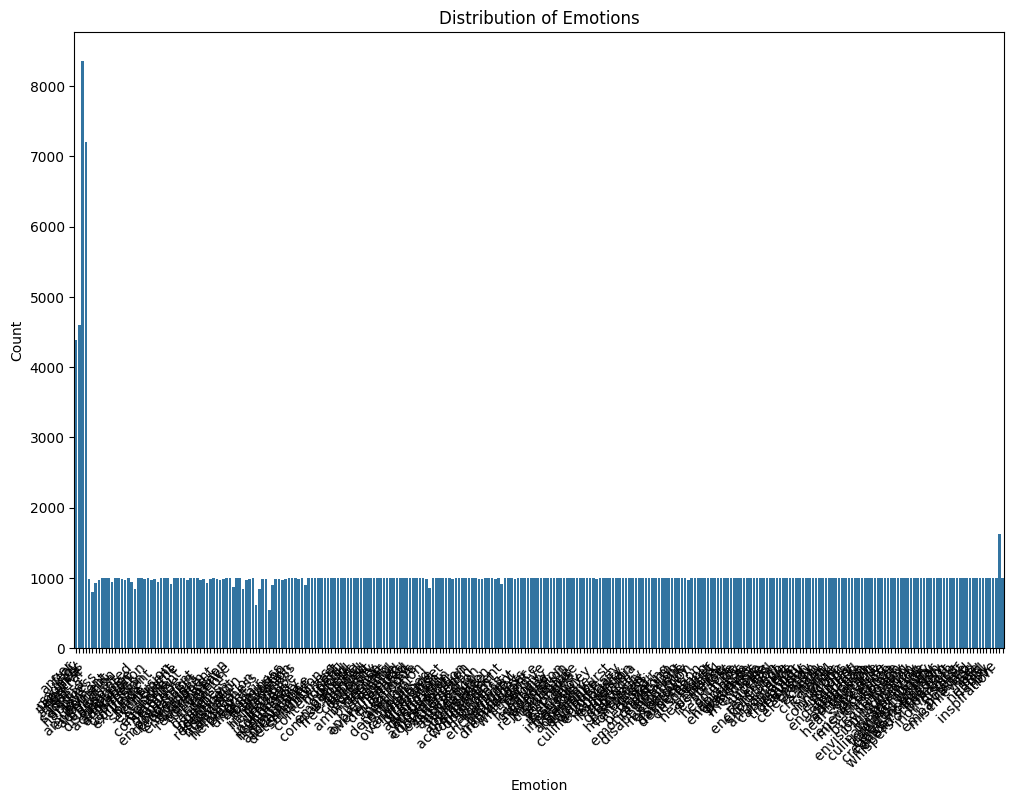

In [ ]:
# Visualize the distribution of emotions
plt.figure(figsize=(12, 8))
sns.countplot(x='Emotion', data=data)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Preprocess the text data
X = data['Sentiment'].values
y = data['Emotion'].values

In [ ]:
# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=5000, lower=True, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index

In [ ]:
# Convert text sequences to integer sequences
X_seq = tokenizer.texts_to_sequences(X)

In [ ]:
# Pad sequences to ensure uniform input length
X_pad = pad_sequences(X_seq, maxlen=100)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

In [ ]:
# Build the model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[early_stopping])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
6038/6038 ━━━━━━━━━━━━━━━━━━━━ 448s 73ms/step - accuracy: 0.4550 - loss: 2.3325 - val_accuracy: 0.9450 - val_loss: 0.1345
Epoch 2/10
6038/6038 ━━━━━━━━━━━━━━━━━━━━ 495s 72ms/step - accuracy: 0.9091 - loss: 0.2607 - val_accuracy: 0.9705 - val_loss: 0.0845
Epoch 3/10
6038/6038 ━━━━━━━━━━━━━━━━━━━━ 438s 73ms/step - accuracy: 0.9471 - loss: 0.1616 - val_accuracy: 0.9817 - val_loss: 0.0576
Epoch 4/10
6038/6038 ━━━━━━━━━━━━━━━━━━━━ 439s 73ms/step - accuracy: 0.9631 - loss: 0.1157 - val_accuracy: 0.9856 - val_loss: 0.0442
Epoch 5/10
6038/6038 ━━━━━━━━━━━━━━━━━━━━ 446s 74ms/step - accuracy: 0.9706 - loss: 0.0916 - val_accuracy: 0.9861 - val_loss: 0.0377
Epoch 6/10
6038/6038 ━━━━━━━━━━━━━━━━━━━━ 510s 75ms/step - accuracy: 0.9745 - loss: 0.0784 - val_accuracy: 0.9853 - val_loss: 0.0397
Epoch 7/10
6038/6038 ━━━━━━━━━━━━━━━━━━━━ 496s 74ms/step - accuracy: 0.9780 - loss: 0.0664 - val_accuracy: 0.9880 - val_loss: 0.0397
Epoch 8/10
6038/6038 ━━━━━━━━━━━━━━━━━━━━ 498s 73ms/step - accuracy: 

In [ ]:
# Save the model
model.save('your_model.h5')

In [ ]:
import pickle

In [ ]:
with open('tokenizer.pkl', 'wb') as handle:
  pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('label_encoder.pkl', 'wb') as handle:
    pickle.dump(label_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

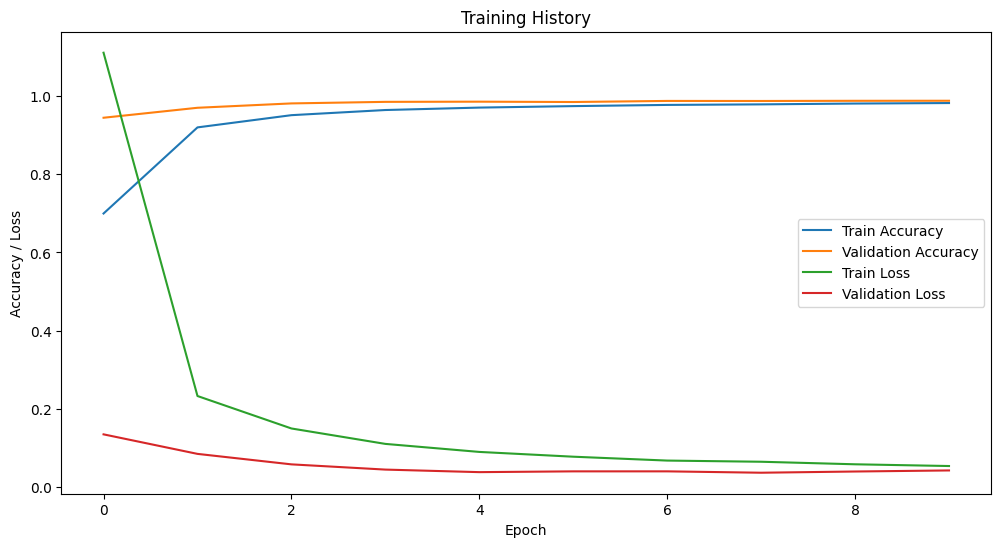

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()
